In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



=== Test Set Evaluation ===
MAE   : 48.09
RMSE  : 88.89
sMAPE : 8.09%
R²    : 0.931

3-Fold CV R² Scores: [0.91184325 0.92056204 0.9152996 ]
Mean CV R²: 0.916


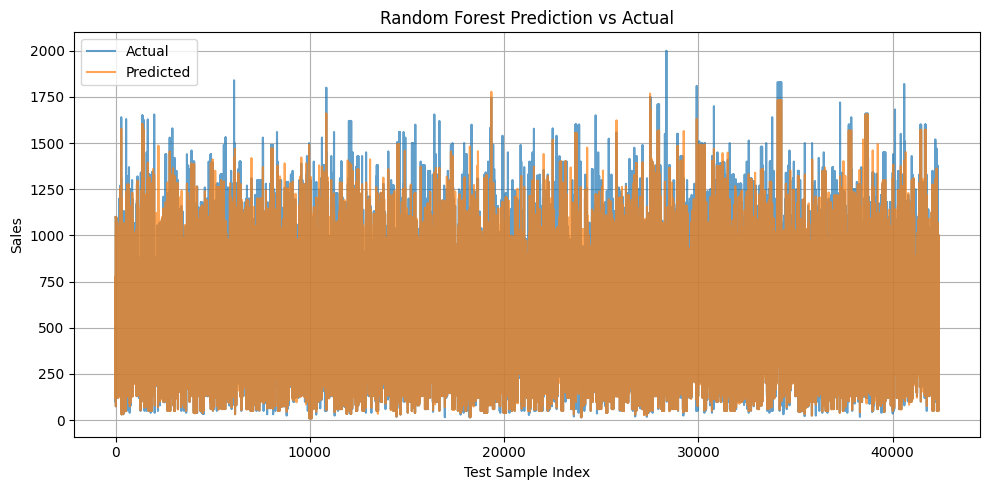

In [ ]:
# === Install Required Libraries ===
!pip install -q scikit-learn

# === Imports ===
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# === Load and Aggregate Dataset ===
file_path = "/content/drive/MyDrive/MRP/Current/Deliverables/Methodology_&_Experiments/Report/Coding/Data_files/Final_Selected_Features_new.csv"
df = pd.read_csv(file_path, parse_dates=["date_only"])
df = df.sort_values("date_only")

# === Feature/Target Split ===
target = "Sales"
features = df.drop(columns=["Sales", "date_only"])
X = features.select_dtypes(include=[np.number])
y = df[target]

# === Normalize Features ===
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# === Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# === Fit Random Forest ===
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# === Predict and Evaluate ===
y_pred = rf.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

def smape(actual, forecast):
    denominator = (np.abs(actual) + np.abs(forecast)) / 2
    diff = np.abs(actual - forecast)
    return np.mean(np.where(denominator == 0, 0, diff / denominator)) * 100

s_mape = smape(y_test.values, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Test Set Evaluation ===")
print(f"MAE   : {mae:.2f}")
print(f"RMSE  : {rmse:.2f}")
print(f"sMAPE : {s_mape:.2f}%")
print(f"R²    : {r2:.3f}")

# === Cross-Validation (3-Fold) on Training Set ===
cv_scores = cross_val_score(rf, X_train, y_train, cv=3, scoring='r2')
print(f"\n3-Fold CV R² Scores: {cv_scores}")
print(f"Mean CV R²: {np.mean(cv_scores):.3f}")

# === Optional: Plot Predicted vs Actual ===
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(y_pred, label="Predicted", alpha=0.7)
plt.title("Random Forest Prediction vs Actual")
plt.xlabel("Test Sample Index")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/MRP/Current/Deliverables/Methodology_&_Experiments/Report/Coding/Data_files/Plots/rf_prediction_vs_actual.png")
plt.show()